In [1]:
import sys
sys.path.append("../")
from mir.common import RepertoireDataset, VDJtoolsParser
from mir.basic import FrequencyTable, DiversityIndices, RarefactionCurve
import pandas as pd
from plotnine import *

Load metadata

In [2]:
metadata = pd.read_table('assets/samples/aging_3year/metadata.txt', sep='\t')
metadata

,file_name,donor,age
0,A6-I200ob.txt.gz,donor1,27
1,A6-I201ob.txt.gz,donor1,30
2,A6-I202ob.txt.gz,donor2,47
3,A5-S23.txt.gz,donor2,50


Load four repertoires for two donors taken 3 years apart

In [3]:
dataset = RepertoireDataset.load(parser=VDJtoolsParser(), 
                                 metadata=metadata,
                                 paths=['assets/samples/aging_3year/' + r['file_name'] 
                                        for _, r in metadata.iterrows()])
print(dataset)

          file_name   donor  age                                         path
0  A6-I200ob.txt.gz  donor1   27  assets/samples/aging_3year/A6-I200ob.txt.gz
1  A6-I201ob.txt.gz  donor1   30  assets/samples/aging_3year/A6-I201ob.txt.gz
2  A6-I202ob.txt.gz  donor2   47  assets/samples/aging_3year/A6-I202ob.txt.gz
3     A5-S23.txt.gz  donor2   50     assets/samples/aging_3year/A5-S23.txt.gz


Compute clonotype frequency tables

In [4]:
freq_table = FrequencyTable.from_repertoire(dataset[0])
print(freq_table)
print(DiversityIndices(freq_table))
print(RarefactionCurve(freq_table))

Frequency table of 1812062 species and 6943910 individuals:
s1=1030393
s2=410225
s3=173924
s4+=197520

Diversity indices for 1812062 species and 6943910 individuals:
Obs=1812062
OPM=260957.01125158594
H=10.677371582051762
Hpielou=0.7409708104914129
Chao=3106115.404776879
Hill=[HillCurvePoint(q=0.0, H_q=1812062.0), HillCurvePoint(q=1.0, H_q=43363.42323100516), HillCurvePoint(q=2.0, H_q=123.75006479012457), HillCurvePoint(q=0.03125, H_q=1761829.3440005737), HillCurvePoint(q=0.03351637893921965, H_q=1758148.1529176803), HillCurvePoint(q=0.03594712503031574, H_q=1754194.1931005584), HillCurvePoint(q=0.038554158857330226, H_q=1749946.7962012251), HillCurvePoint(q=0.041350265534244854, H_q=1745383.6581880809), HillCurvePoint(q=0.04434915740425935, H_q=1740480.6993411232), HillCurvePoint(q=0.047565541286280176, H_q=1735211.910688883), HillCurvePoint(q=0.05101519059840202, H_q=1729549.185348594), HillCurvePoint(q=0.054715022712081854, H_q=1723462.1330262818), HillCurvePoint(q=0.058683181916356

Diversity index table

In [5]:
DiversityIndices.for_dataset(dataset)

,file_name,donor,age,path,depth,obs,opm,shannon,pielou,chao
0,A6-I200ob.txt.gz,donor1,27,assets/samples/aging_3year/A6-I200ob.txt.gz,6943910,1812062,260957.011252,10.677372,0.740971,3.106115e+06
1,A6-I201ob.txt.gz,donor1,30,assets/samples/aging_3year/A6-I201ob.txt.gz,1526650,758985,497157.174205,11.596713,0.856495,2.435928e+06
2,A6-I202ob.txt.gz,donor2,47,assets/samples/aging_3year/A6-I202ob.txt.gz,5927514,954170,160973.048735,9.005132,0.654034,1.615411e+06
3,A5-S23.txt.gz,donor2,50,assets/samples/aging_3year/A5-S23.txt.gz,517858,137624,265756.249783,7.579462,0.640575,5.310657e+05


Hill curve plot

/Users/mikesh/vcs/mirpy/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


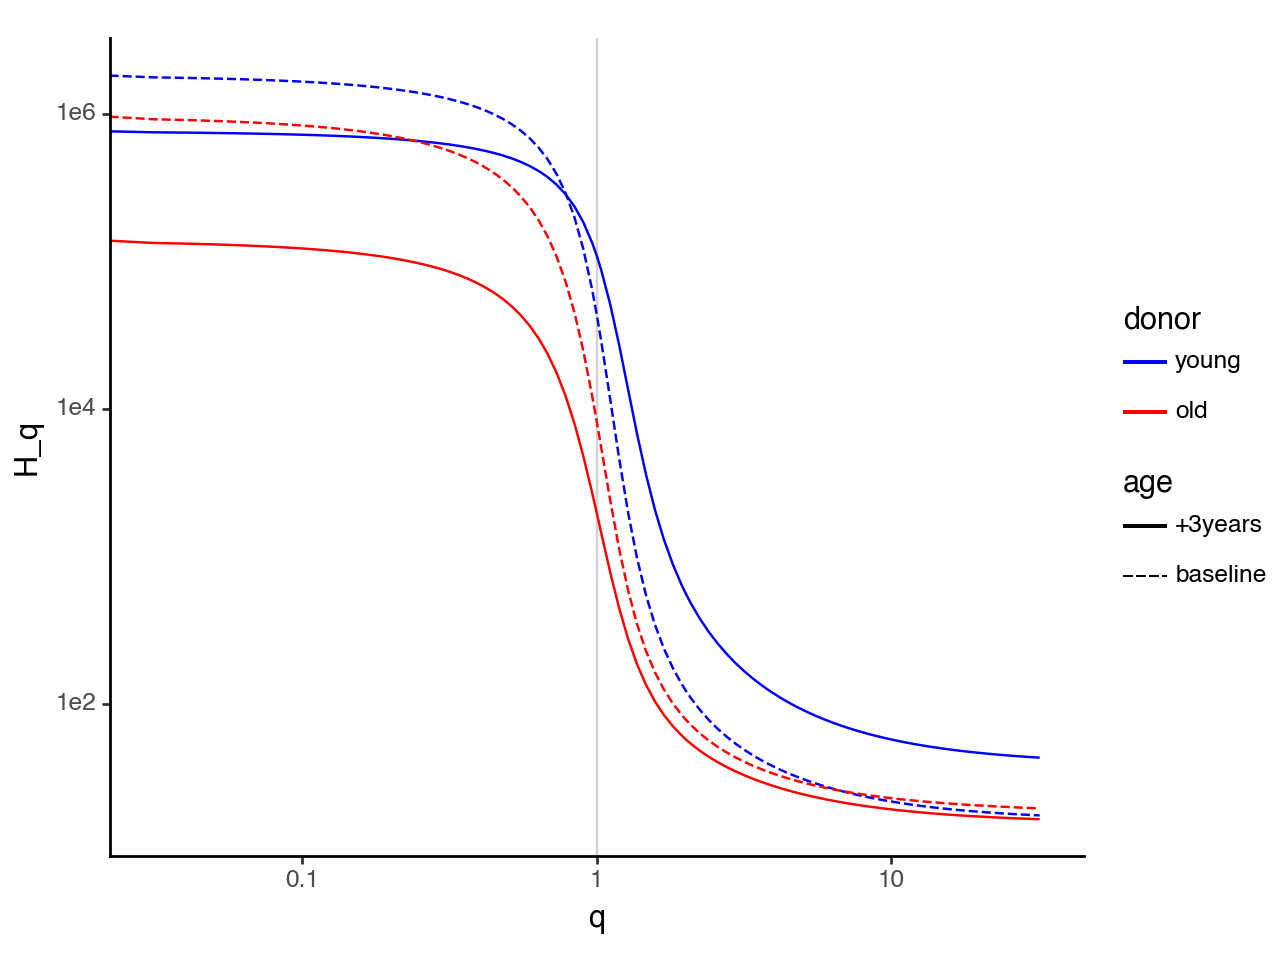

In [6]:
df_hc = DiversityIndices.hill_curve_for_dataset(dataset)
df_hc['age'] = df_hc['age'].apply(lambda x: '+3years' if x not in {27, 47} else 'baseline')
plt = (ggplot(df_hc, aes(x='q', y='H_q', 
                         color='donor', linetype='age')) + 
       geom_vline(xintercept=1., color='lightgrey') +
       geom_line() + 
       scale_x_log10(name='q') +
       scale_y_log10(name='H_q') +
       scale_color_manual(values=['blue', 'red'],
                          labels=['young', 'old']) +
       theme_classic())
print(plt) 

Rarefaction curves

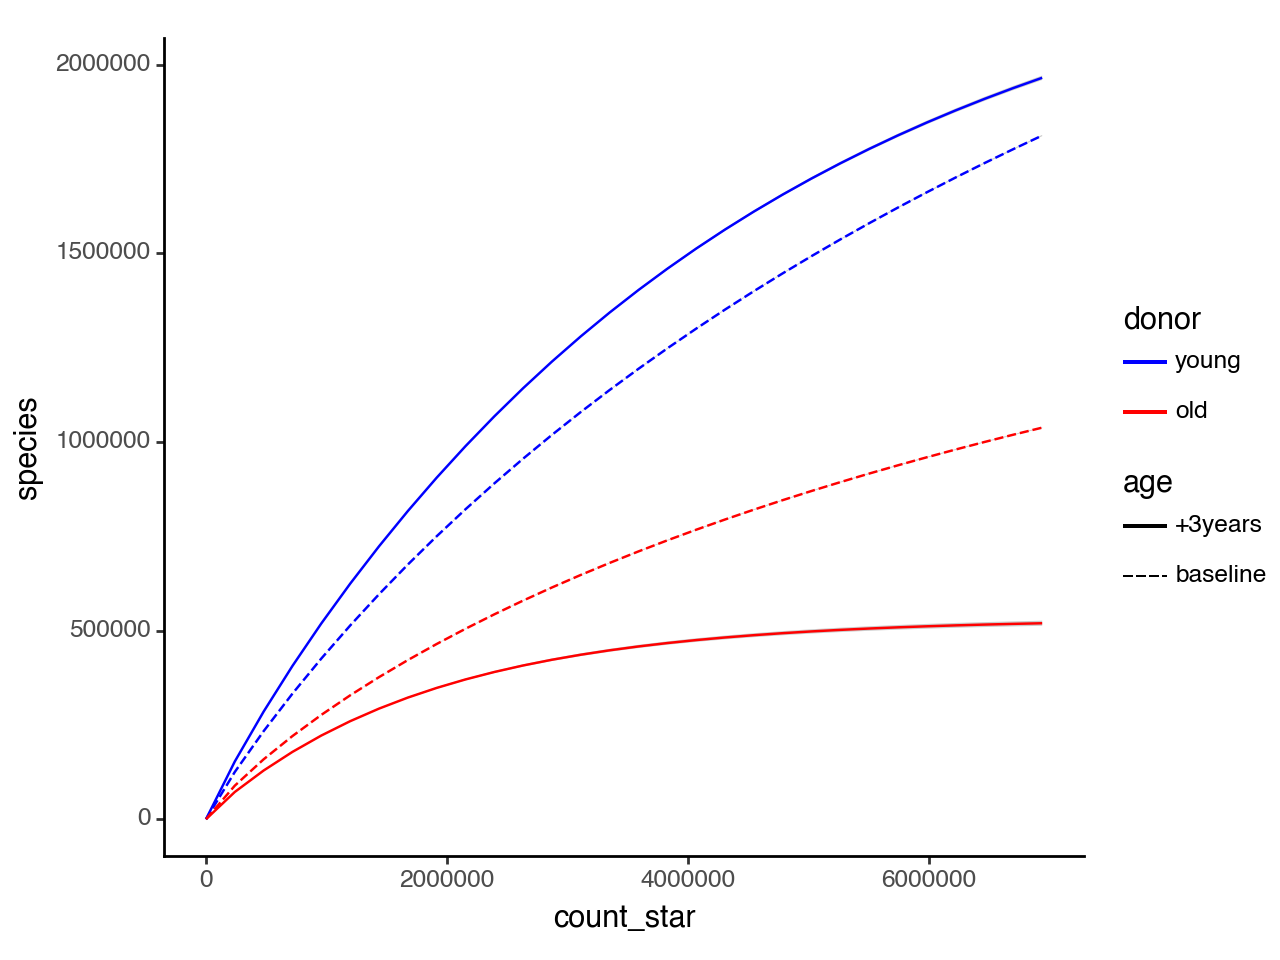

In [10]:
df_rarefy = RarefactionCurve.for_dataset(dataset)
df_rarefy['age'] = df_rarefy['age'].apply(lambda x: '+3years' if x not in {27, 47} else 'baseline')
plt = (ggplot(df_rarefy, aes(group = 'file_name', x='count_star', y='species')) +         
       geom_ribbon(aes(ymin='species - 1.96 * var_species ** 0.5', 
                       ymax='species + 1.96 * var_species ** 0.5'), alpha=0.25) +
       geom_line(aes(color='donor', linetype='age')) + 
       scale_color_manual(values=['blue', 'red'],
                          labels=['young', 'old']) +
       theme_classic())
print(plt) 